# Week 5 Assignment

In [3]:
# get a dataset from Kaggle
# do EDA
# https://www.kaggle.com/szamil/who-suicide-statistics/version/1
'''Submit one Py notebook with the following:
1) Select new dataset
2) Read csv/txt with Pandas
3) Perform EDA (Early Data Exploration) (descriptive statistics, histograms)
4) Use groupby, correlations to understand the dataset
5) Plot data with Matplotlib for visualizing the dataset
6) Identify target and factors
7) Explain your dataset with high-level analysis

Dataset repositories:
https://archive.ics.uci.edu/ml/datasets.html
https://www.kaggle.com/datasets'''

#Q1 - trend of number of suicides over time

'Submit one Py notebook with the following:\n1) Select new dataset\n2) Read csv/txt with Pandas\n3) Perform EDA (Early Data Exploration) (descriptive statistics, histograms)\n4) Use groupby, correlations to understand the dataset\n5) Plot data with Matplotlib for visualizing the dataset\n6) Identify target and factors\n7) Explain your dataset with high-level analysis\n\nDataset repositories:\nhttps://archive.ics.uci.edu/ml/datasets.html\nhttps://www.kaggle.com/datasets'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("who_suicide_statistics.csv")

In [6]:
print(df)

                    country  year     sex          age  suicides_no  \
0                   Albania  1985  female  15-24 years          NaN   
1                   Albania  1985  female  25-34 years          NaN   
2                   Albania  1985  female  35-54 years          NaN   
3                   Albania  1985  female   5-14 years          NaN   
4                   Albania  1985  female  55-74 years          NaN   
5                   Albania  1985  female    75+ years          NaN   
6                   Albania  1985    male  15-24 years          NaN   
7                   Albania  1985    male  25-34 years          NaN   
8                   Albania  1985    male  35-54 years          NaN   
9                   Albania  1985    male   5-14 years          NaN   
10                  Albania  1985    male  55-74 years          NaN   
11                  Albania  1985    male    75+ years          NaN   
12                  Albania  1986  female  15-24 years          NaN   
13    

In [8]:
df.head()

country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years          NaN    277900.0
1  Albania  1985  female  25-34 years          NaN    246800.0
2  Albania  1985  female  35-54 years          NaN    267500.0
3  Albania  1985  female   5-14 years          NaN    298300.0
4  Albania  1985  female  55-74 years          NaN    138700.0

In [9]:
# should I drop rows with NaN for number of suicicdes?
# should i create catogiries that are non numbers
# such as country, sex and age ranges? 

df.describe()

year   suicides_no    population
count  43776.000000  41520.000000  3.831600e+04
mean    1998.502467    193.315390  1.664091e+06
std       10.338711    800.589926  3.647231e+06
min     1979.000000      0.000000  2.590000e+02
25%     1990.000000      1.000000  8.511275e+04
50%     1999.000000     14.000000  3.806550e+05
75%     2007.000000     91.000000  1.305698e+06
max     2016.000000  22338.000000  4.380521e+07

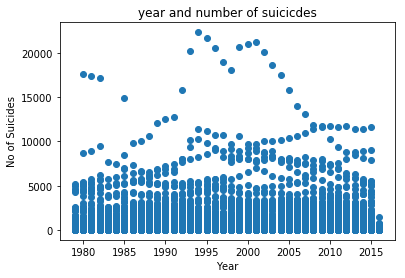

In [10]:
# let's plot year and no of suicides
plt.title("year and number of suicicdes")
plt.xlabel("Year")
plt.ylabel("No of Suicides")
plt.scatter(df['year'],df['suicides_no'])
plt.show()

In [11]:
# check for correlations
df.corr()

year  suicides_no  population
year         1.000000    -0.011985    0.027016
suicides_no -0.011985     1.000000    0.611406
population   0.027016     0.611406    1.000000

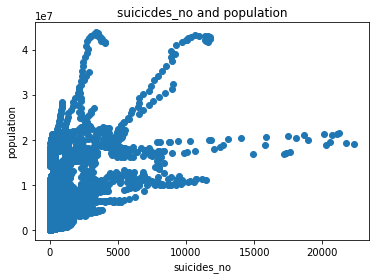

In [12]:
plt.title("suicicdes_no and population") 
plt.xlabel("suicides_no") 
plt.ylabel("population") 
plt.scatter(df['suicides_no'],df['population'])
plt.show()

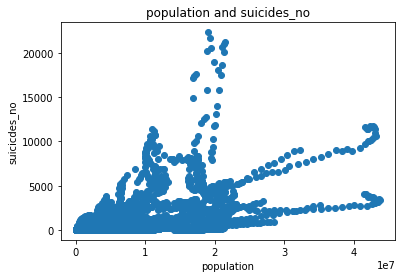

In [13]:
# ugly chart earlier. let's reverse it
plt.title("population and suicides_no") 
plt.xlabel("population") 
plt.ylabel("suicicdes_no") 
plt.scatter(df['population'],df['suicides_no'])
plt.show()

In [14]:
# let's group by country
df1 = df.groupby("country").year.describe()
print(df1)

                                    count         mean        std     min  \
country                                                                     
Albania                             372.0  2000.000000   8.956318  1985.0   
Anguilla                            348.0  1999.517241  10.511815  1983.0   
Antigua and Barbuda                 336.0  1998.892857   9.441753  1983.0   
Argentina                           444.0  1997.000000  10.689122  1979.0   
Armenia                             420.0  1998.914286  10.250434  1981.0   
Aruba                               240.0  2004.550000   7.502134  1987.0   
Australia                           444.0  1997.000000  10.689122  1979.0   
Austria                             456.0  1997.500000  10.977900  1979.0   
Azerbaijan                          300.0  1993.920000   7.479309  1981.0   
Bahamas                             348.0  1997.517241  10.382719  1979.0   
Bahrain                             252.0  2002.809524   8.184831  1985.0   

In [15]:
df2 = df.groupby("year", as_index = False)["suicides_no","population"].sum()
# had a problem with grouping. it converted to a series instead of a data frame. fixed that.
type(df2)

pandas.core.frame.DataFrame

In [47]:
#get list of column names
print(df2)

    year  suicides_no    population
0   1979      92790.0  9.841685e+08
1   1980     153548.0  1.220095e+09
2   1981     178014.0  1.310398e+09
3   1982     182893.0  1.276454e+09
4   1983     122430.0  1.333573e+09
5   1984     124427.0  1.217641e+09
6   1985     197533.0  1.404640e+09
7   1986     189225.0  1.425017e+09
8   1987     186364.0  1.472508e+09
9   1988     181416.0  1.393106e+09
10  1989     186043.0  1.407480e+09
11  1990     205507.0  1.549001e+09
12  1991     204756.0  1.597419e+09
13  1992     219100.0  1.674393e+09
14  1993     229243.0  1.589658e+09
15  1994     240628.0  1.660033e+09
16  1995     245915.0  1.662675e+09
17  1996     250353.0  1.754775e+09
18  1997     244322.0  1.771464e+09
19  1998     253279.0  1.794330e+09
20  1999     259984.0  1.809551e+09
21  2000     259905.0  1.895363e+09
22  2001     255071.0  1.854263e+09
23  2002     260401.0  1.927376e+09
24  2003     260429.0  1.945385e+09
25  2004     245249.0  1.866378e+09
26  2005     238622.0  1.884

In [48]:
# convert to integers so that we can graph
df2.astype(dtype='int32', copy=True, errors='raise')

year  suicides_no  population
0   1979        92790   984168507
1   1980       153548  1220094727
2   1981       178014  1310398346
3   1982       182893  1276454146
4   1983       122430  1333572968
5   1984       124427  1217640586
6   1985       197533  1404640168
7   1986       189225  1425016672
8   1987       186364  1472508243
9   1988       181416  1393106049
10  1989       186043  1407479955
11  1990       205507  1549000523
12  1991       204756  1597418530
13  1992       219100  1674392956
14  1993       229243  1589658353
15  1994       240628  1660032535
16  1995       245915  1662675405
17  1996       250353  1754774950
18  1997       244322  1771463691
19  1998       253279  1794330209
20  1999       259984  1809550646
21  2000       259905  1895363112
22  2001       255071  1854262647
23  2002       260401  1927375725
24  2003       260429  1945384864
25  2004       245249  1866377992
26  2005       238622  1884375481
27  2006       237200  1962322925
28  2007       237211  1963479543
29  2008       239368  1971368772
30  2009       247324  2089017139
31  2010       242243  2115656222
32  2011       239972  2118125153
33  2012       234085  2046592563
34  2013       229421 -2147483648
35  2014       227793 -2147483648
36  2015       207908  1948656777
37  2016        16483   525439532

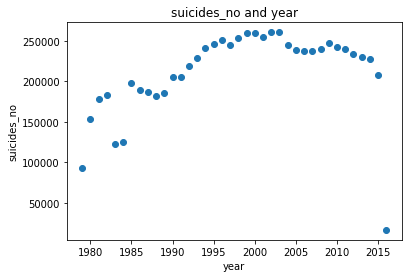

In [16]:
#plot years against suicide numbers
plt.title("suicides_no and year") 
plt.xlabel("year") 
plt.ylabel("suicides_no") 
plt.scatter(df2['year'],df2['suicides_no'])
plt.show()

In [17]:
# let's see if we can create a 3rd column which is a percentage
# reference
# https://stackoverflow.com/questions/14059094/i-want-to-multiply-two-columns-in-a-pandas-dataframe-and-add-the-result-into-a-n
# example: orders_df['Value'] = orders_df.Prices * orders_df.Amount * orders_df.C
df2['percentage'] = df2.suicides_no / df2.population
print(df2)

    year  suicides_no    population  percentage
0   1979      92790.0  9.841685e+08    0.000094
1   1980     153548.0  1.220095e+09    0.000126
2   1981     178014.0  1.310398e+09    0.000136
3   1982     182893.0  1.276454e+09    0.000143
4   1983     122430.0  1.333573e+09    0.000092
5   1984     124427.0  1.217641e+09    0.000102
6   1985     197533.0  1.404640e+09    0.000141
7   1986     189225.0  1.425017e+09    0.000133
8   1987     186364.0  1.472508e+09    0.000127
9   1988     181416.0  1.393106e+09    0.000130
10  1989     186043.0  1.407480e+09    0.000132
11  1990     205507.0  1.549001e+09    0.000133
12  1991     204756.0  1.597419e+09    0.000128
13  1992     219100.0  1.674393e+09    0.000131
14  1993     229243.0  1.589658e+09    0.000144
15  1994     240628.0  1.660033e+09    0.000145
16  1995     245915.0  1.662675e+09    0.000148
17  1996     250353.0  1.754775e+09    0.000143
18  1997     244322.0  1.771464e+09    0.000138
19  1998     253279.0  1.794330e+09    0

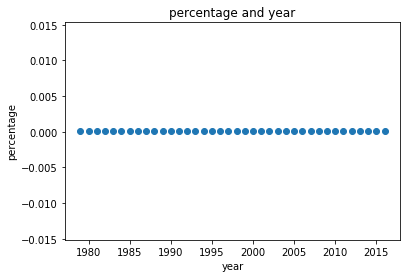

In [18]:
# lets plot year and percentage
#plot years against suicide numbers
plt.title("percentage and year") 
plt.xlabel("year") 
plt.ylabel("percentage") 
plt.scatter(df2['year'],df2['percentage'])
plt.show()

In [31]:
# multiply percentage so that it's bigger
# use a big multiplier
# drop last year
df2['percentage'] = df2.suicides_no / df2.population * 1000000
df3 = df2.drop(df2.index[-1])
print(df3)

    year  suicides_no    population  percentage
0   1979      92790.0  9.841685e+08   94.282635
1   1980     153548.0  1.220095e+09  125.849245
2   1981     178014.0  1.310398e+09  135.847241
3   1982     182893.0  1.276454e+09  143.282076
4   1983     122430.0  1.333573e+09   91.806000
5   1984     124427.0  1.217641e+09  102.186968
6   1985     197533.0  1.404640e+09  140.628899
7   1986     189225.0  1.425017e+09  132.787920
8   1987     186364.0  1.472508e+09  126.562280
9   1988     181416.0  1.393106e+09  130.224113
10  1989     186043.0  1.407480e+09  132.181634
11  1990     205507.0  1.549001e+09  132.670711
12  1991     204756.0  1.597419e+09  128.179307
13  1992     219100.0  1.674393e+09  130.853393
14  1993     229243.0  1.589658e+09  144.208974
15  1994     240628.0  1.660033e+09  144.953785
16  1995     245915.0  1.662675e+09  147.903192
17  1996     250353.0  1.754775e+09  142.669577
18  1997     244322.0  1.771464e+09  137.920975
19  1998     253279.0  1.794330e+09  141

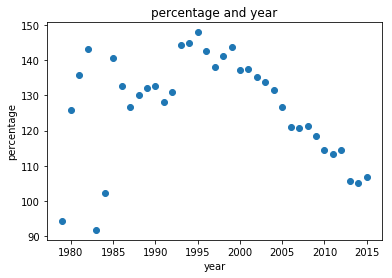

In [32]:
#plot again
# lets plot year and percentage
#plot years against suicide numbers
plt.title("percentage and year") 
plt.xlabel("year") 
plt.ylabel("percentage") 
plt.scatter(df3['year'],df3['percentage'])
plt.show()

In [ ]:
# in summary, as a percentage, there didn't seem to be much of a difference over time
# expanding it by using a multiplier showed variation, but this may be misleading
# it doesn't really support an increase or decrease over time
# this may warrant further study because data shows that in the US, there is an increase


In [34]:
# let's look at the group by country data in df1
df.head()

country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years          NaN    277900.0
1  Albania  1985  female  25-34 years          NaN    246800.0
2  Albania  1985  female  35-54 years          NaN    267500.0
3  Albania  1985  female   5-14 years          NaN    298300.0
4  Albania  1985  female  55-74 years          NaN    138700.0

In [54]:
# let's try to drop anything with NaN
df9 = df.dropna()
print(df9)

                    country  year     sex          age  suicides_no  \
24                  Albania  1987  female  15-24 years         14.0   
25                  Albania  1987  female  25-34 years          4.0   
26                  Albania  1987  female  35-54 years          6.0   
27                  Albania  1987  female   5-14 years          0.0   
28                  Albania  1987  female  55-74 years          0.0   
29                  Albania  1987  female    75+ years          1.0   
30                  Albania  1987    male  15-24 years         21.0   
31                  Albania  1987    male  25-34 years          9.0   
32                  Albania  1987    male  35-54 years         16.0   
33                  Albania  1987    male   5-14 years          0.0   
34                  Albania  1987    male  55-74 years          1.0   
35                  Albania  1987    male    75+ years          1.0   
36                  Albania  1988  female  15-24 years          8.0   
37    

In [55]:
# let's group by cuontry and sum up the suicicdes_no and population
# that way we can get a percentage by population and graph that per country
df10 = df9.groupby("country", as_index = False)["suicides_no","population"].sum()
df10.head()

country  suicides_no    population
0              Albania       1970.0  6.232547e+07
1  Antigua and Barbuda         11.0  2.054919e+06
2            Argentina      93862.0  1.190238e+09
3              Armenia       2422.0  9.784436e+07
4                Aruba        120.0  1.762045e+06

In [56]:
# add the percentage column
df10['percentage'] = df10.suicides_no / df10.population 
df10.head()

country  suicides_no    population  percentage
0              Albania       1970.0  6.232547e+07    0.000032
1  Antigua and Barbuda         11.0  2.054919e+06    0.000005
2            Argentina      93862.0  1.190238e+09    0.000079
3              Armenia       2422.0  9.784436e+07    0.000025
4                Aruba        120.0  1.762045e+06    0.000068

In [57]:
# might have to drop countries wiht inf percentage
# print and take a look
print(df10)

                                country  suicides_no    population  percentage
0                               Albania       1970.0  6.232547e+07    0.000032
1                   Antigua and Barbuda         11.0  2.054919e+06    0.000005
2                             Argentina      93862.0  1.190238e+09    0.000079
3                               Armenia       2422.0  9.784436e+07    0.000025
4                                 Aruba        120.0  1.762045e+06    0.000068
5                             Australia      80279.0  6.255387e+08    0.000128
6                               Austria      60179.0  2.802448e+08    0.000215
7                            Azerbaijan       3366.0  1.529490e+08    0.000022
8                               Bahamas        107.0  7.308348e+06    0.000015
9                               Bahrain        463.0  1.675393e+07    0.000028
10                             Barbados        205.0  7.590791e+06    0.000027
11                              Belarus      74974.0

In [58]:
# we can sort and drop a range
df10.sort_values(by=['percentage'])

country  suicides_no    population  percentage
21          Cayman Islands          0.0  2.940000e+04    0.000000
89   Saint Kitts and Nevis          0.0  1.173000e+05    0.000000
32                   Egypt       1206.0  1.189403e+09    0.000001
75                    Oman         33.0  8.987087e+06    0.000004
53                 Jamaica        198.0  4.918263e+07    0.000004
1      Antigua and Barbuda         11.0  2.054919e+06    0.000005
63                Maldives         20.0  2.900246e+06    0.000007
67                 Mayotte          6.0  7.540880e+05    0.000008
99            South Africa       7321.0  8.731308e+08    0.000008
30                Dominica          4.0  3.817000e+05    0.000010
8                  Bahamas        107.0  7.308348e+06    0.000015
93   Sao Tome and Principe          4.0  2.655000e+05    0.000015
57                  Kuwait       1013.0  6.472109e+07    0.000016
42                 Grenada         38.0  2.365726e+06    0.000016
111   United Arab Emirates        622.0  3.650228e+07    0.000017
17       Brunei Darussalam        123.0  6.640328e+06    0.000019
78             Philippines      21330.0  1.065068e+09    0.000020
108                 Turkey      10131.0  4.826406e+08    0.000021
7               Azerbaijan       3366.0  1.529490e+08    0.000022
3                  Armenia       2422.0  9.784436e+07    0.000025
44               Guatemala       8403.0  3.296474e+08    0.000025
82                   Qatar        576.0  2.209728e+07    0.000026
10                Barbados        205.0  7.590791e+06    0.000027
9                  Bahrain        463.0  1.675393e+07    0.000028
0                  Albania       1970.0  6.232547e+07    0.000032
49   Iran (Islamic Rep of)       7299.0  2.145477e+08    0.000034
27                  Cyprus        412.0  1.169914e+07    0.000035
77                Paraguay       5082.0  1.413689e+08    0.000036
35                    Fiji        304.0  8.187391e+06    0.000037
68                  Mexico     117479.0  3.134138e+09    0.000037
..                     ...          ...           ...         ...
103                 Sweden      37800.0  2.544251e+08    0.000149
114                Uruguay      14647.0  9.745864e+07    0.000150
79                  Poland     172562.0  1.104560e+09    0.000156
18                Bulgaria      42868.0  2.732952e+08    0.000157
61              Luxembourg       2367.0  1.501486e+07    0.000158
26                    Cuba      41418.0  2.517901e+08    0.000164
69                Mongolia        450.0  2.698164e+06    0.000167
28          Czech Republic      51664.0  3.039279e+08    0.000170
104            Switzerland      26217.0  1.499940e+08    0.000175
84     Republic of Moldova      22447.0  1.224285e+08    0.000183
102               Suriname       2492.0  1.322218e+07    0.000188
45                  Guyana       3438.0  1.813669e+07    0.000190
94                  Serbia      24179.0  1.261401e+08    0.000192
83       Republic of Korea     261730.0  1.354945e+09    0.000193
37                  France     395500.0  1.973575e+09    0.000200
12                 Belgium      75948.0  3.587922e+08    0.000212
6                  Austria      60179.0  2.802448e+08    0.000215
25                 Croatia      29400.0  1.367632e+08    0.000215
54                   Japan     937614.0  4.340184e+09    0.000216
36                 Finland      33677.0  1.419257e+08    0.000237
110                Ukraine     365170.0  1.474109e+09    0.000248
55              Kazakhstan     123151.0  4.757722e+08    0.000259
98                Slovenia      16805.0  5.897722e+07    0.000285
11                 Belarus      74974.0  2.615586e+08    0.000287
34                 Estonia      12671.0  4.405160e+07    0.000288
59                  Latvia      24861.0  8.093534e+07    0.000307
101              Sri Lanka      80747.0  2.488106e+08    0.000325
88      Russian Federation    1500992.0  4.607764e+09    0.000326
47                 Hungary     130018.0  3.687719e+08    0.

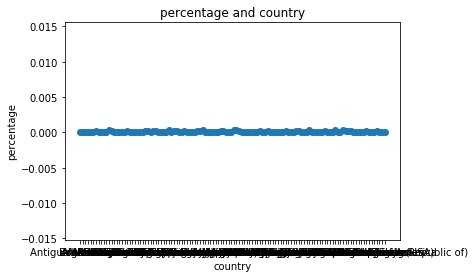

In [59]:
#plot again
# lets plot percentage and country

plt.title("percentage and country") 
plt.xlabel("country") 
plt.ylabel("percentage") 
plt.scatter(df10['country'],df10['percentage'])
plt.show()

In [60]:
import bokeh
print(bokeh.__version__)

1.0.2


In [61]:
# let's use bokeh
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [67]:
p = figure(plot_width=600, plot_height=400)
p.xaxis.axis_label = "country"
p.yaxis.axis_label = "percentage"
p.circle('country', 'percentage',size=5, source=df10)
show(p)